<a href="https://colab.research.google.com/github/ross13elder/ross13elder.github.io/blob/main/FoodHub_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# let colab access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing data set
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Foundations/Project 1 - FoodHub/foodhub_order.csv')

In [ ]:
# making sure it is the correct dataset by checking the first five rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Checking the shape of the dataframe
print('There are', df.shape[0], 'rows and', df.shape[1],'columns')

There are 1898 rows and 9 columns


#### Observations:
* There are 1898 rows and 9 columns
* There were 1898 orders made by registered customers in their online portal

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   There are 5 numerical columns and 4 object type columns in the dataset
*   Rating is being read as object type but should be an int64 or float format. This is because there are some orders who did not give rating, "Not given", so we will need to change those to NaN
*   Order ID and Customer ID are categorical data
*   Day_of_the_week is stating if the order was made on the weekday or weekend
Total memory usage is approximately 133.6KB






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking to see how many missing values are present in each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no missing values in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Checking statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* The rows for order_id and customer_id can be ignored, since these values are really categorical.

* **Cost of the order:** On average the cost of the order is $16.50. The minimum cost was 4.47, while the maximum cost was 35.41.  

* **Food Preperation Time:** On average it takes 27.37 minutes for the food to be prepared once it has been ordered.  The minimum time for preperation was 20 minutes, while the maximum time was 35 minutes.

* **Delivery Time:** On average the time from pick up of the order to delivered to the customer is 24.16 minutes.  The minimum time taken was 15 minutes, and the maximum time was 33 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Checking to see number of ratings for "Not Given", 5, 4, 3, 2, or 1
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
# Checking percentage of ratings for "Not Given", 5, 4, 3, 2, or 1
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [ ]:
# Replacing "Not given" ratings to be NaN
df['rating'] = df['rating'].replace(['Not given'], np.nan)

# Changing the data type to float
df['rating'] = df['rating'].astype(float)

# checking to see if it changed
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
# Checking, If rated, what is the percentage of a 5,4,3
df['rating'].value_counts(normalize=True)

5.0    0.506024
4.0    0.332186
3.0    0.161790
Name: rating, dtype: float64

#### Observations:
* There were 736 orders that did not give a rating, and this is about 38.77% of the orders.

* When rated, about half of the ratings were a 5 out of 5, saying they were very satisfied with the service.  

* There were no ratings of a 1 or 2 given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Checking number of orders
df['order_id'].nunique()

1898

There are 1898 unique orders.

In [ ]:
# Checking number of unique customers
df['customer_id'].nunique()

1200

This means there are 1200 unique customers.  

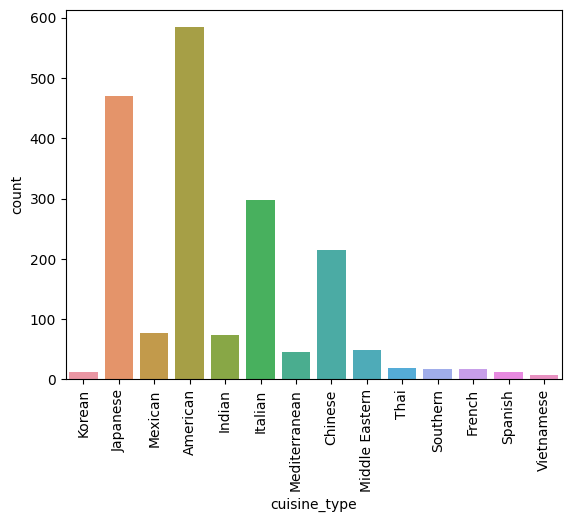

In [ ]:
# Breakdown of type of cuisine ordered
sns.countplot(data=df, x = 'cuisine_type');
plt.xticks(rotation = 90);

In [ ]:
# checking percentage of cuisine type ordered
df.groupby(['cuisine_type']).count()/df.shape[0]

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,0.307692,0.307692,0.307692,0.307692,0.307692,0.193888,0.307692,0.307692
Chinese,0.113277,0.113277,0.113277,0.113277,0.113277,0.070074,0.113277,0.113277
French,0.009484,0.009484,0.009484,0.009484,0.009484,0.005269,0.009484,0.009484
Indian,0.038462,0.038462,0.038462,0.038462,0.038462,0.026344,0.038462,0.038462
Italian,0.157007,0.157007,0.157007,0.157007,0.157007,0.090622,0.157007,0.157007
Japanese,0.247629,0.247629,0.247629,0.247629,0.247629,0.143836,0.247629,0.247629
Korean,0.006849,0.006849,0.006849,0.006849,0.006849,0.004742,0.006849,0.006849
Mediterranean,0.024236,0.024236,0.024236,0.024236,0.024236,0.016860,0.024236,0.024236
Mexican,0.040569,0.040569,0.040569,0.040569,0.040569,0.025290,0.040569,0.040569


*   American is the most ordered cuisine.
*   82% of the orders are from American, Japanese, Italian, and Chinese cuisines.
*   Vietnamese, Korean, Spanish, and French cuisines all were less than 1% of the number of orders.



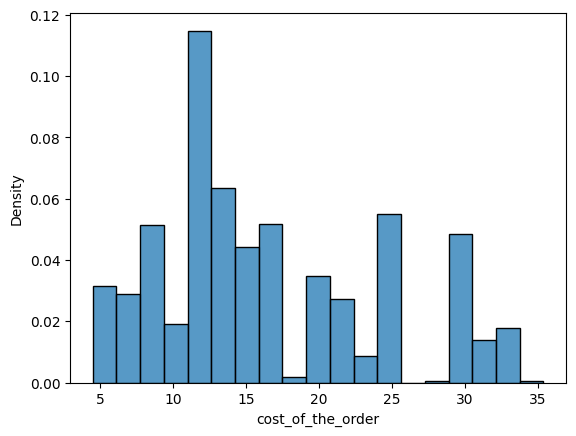

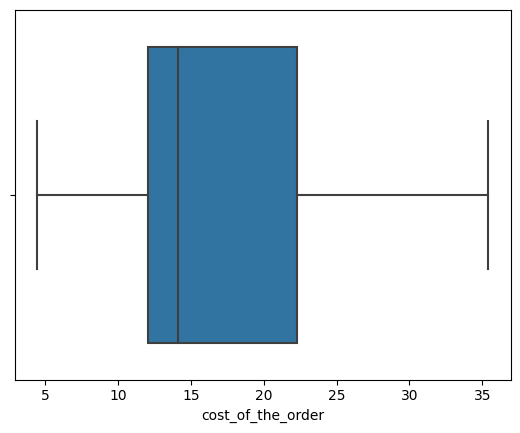

In [ ]:
# Check distribution of price of orders
sns.histplot(data=df,x='cost_of_the_order',stat='density')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()



*   The distribution of cost of the orders is right skewed
*   Range is approx. $30, from 5-35

*   Median is approx. $14

*   No outliers are present, and there is a gap in the data between approx. $26-27.5



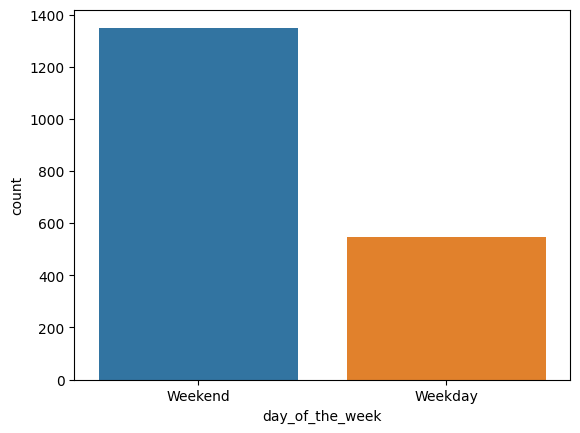

In [ ]:
# Check to see when orders were made during the week
sns.countplot(data=df,x='day_of_the_week');

In [ ]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64



*   Orders made during the weekend are more than double the orders made during the weekdays.




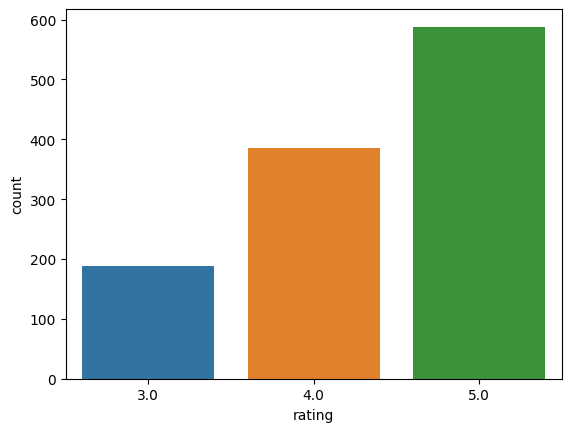

In [ ]:
# Check the distribution of ratings
sns.countplot(data=df, x='rating');



*   There is a left skewed distribution when a rating was given.
*   A rating of 5 was given the most often.
*   There were no ratings given below 3, so no ratings of 1 or 2.  



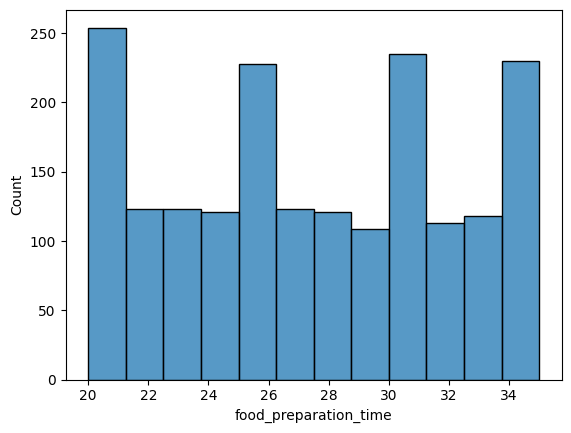

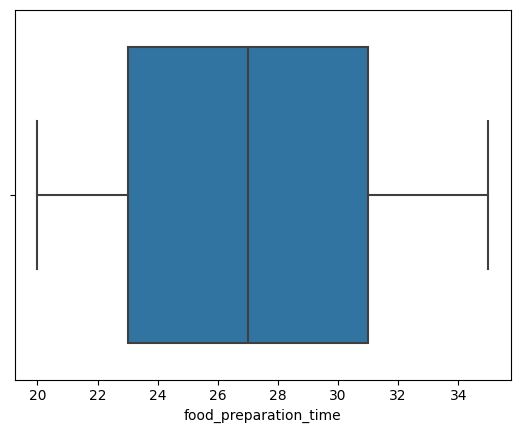

In [ ]:
# Check the distribution of food preparation time
sns.histplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()



*   Distribution of food preparation time is almost uniform, except with four peaks in the data around: 21, 26, 31, and 35 minutes.  
*   Those peaks in data almost double the other amount of time given to food prepareation.
*  The range is 15, from 20-35minutes
* The median is approx. 27minutes



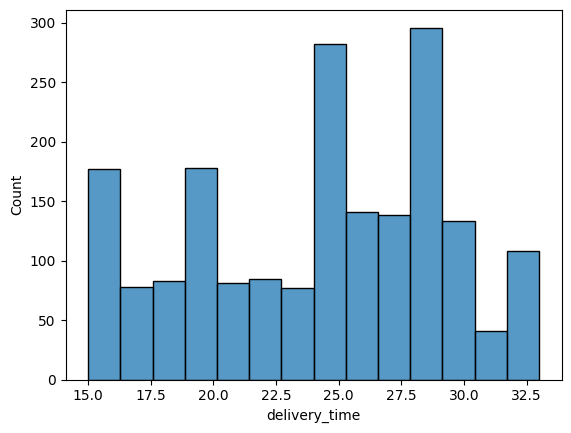

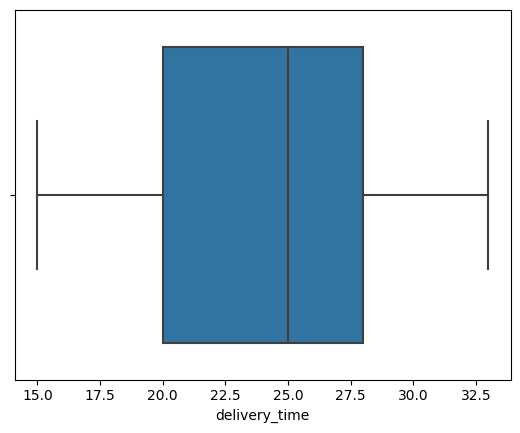

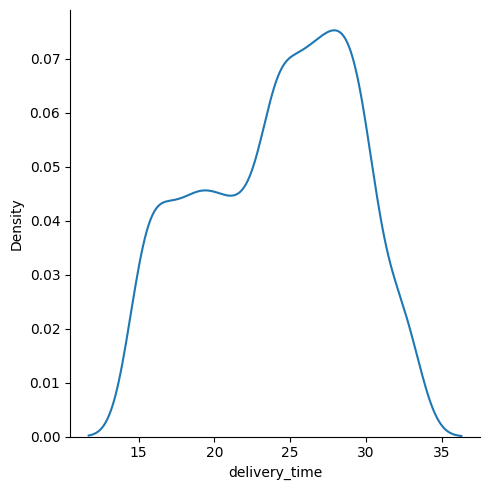

In [ ]:
# Check the distribution of delivery time
sns.histplot(data=df, x='delivery_time')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()
sns.displot(data=df, x='delivery_time',kind='kde')
plt.show()


*   The distribution of delivery time is slightly left skewed
*   Median is approx. 25 minutes
*   No outliers are present
*   The range is 18minutes, from 15-33 minutes
*  There appears to be two peaks on delivery time between 15-20minutes, and 25-30minutes.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Check number of restraunts used
df['restaurant_name'].nunique()

178

In [ ]:
#Check number of times a restraunt was used
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
#Checking the number of restaurants used more than once
df['restaurant_name'].value_counts().loc[lambda x: x>1]

Shake Shack                     219
The Meatball Shop               132
Blue Ribbon Sushi               119
Blue Ribbon Fried Chicken        96
Parm                             68
                               ... 
Tarallucci e Vino Restaurant      2
Big Daddy's                       2
Xe May Sandwich Shop              2
DespaÌ±a                          2
Mira Sushi                        2
Name: restaurant_name, Length: 128, dtype: int64

#### Observations:
* There were 178 restaurants that customers ordered from, and 128 of those were used more than once.

* Top 5 restraunts in terms of orders recieved:

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#Checking number of orders during time of the week
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# checking the breakdown of cuisine ordered by day of the week
df.groupby('cuisine_type').value_counts(['day_of_the_week'])

cuisine_type    day_of_the_week
American        Weekend            415
                Weekday            169
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            207
                Weekday             91
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend         

In [ ]:
# finding the cuisine type of orders made on the weekend
df.loc[df['day_of_the_week']=='Weekend', 'cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [ ]:
# Could have also created a dataframe for weekend orders
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
* American was the cuisine type most ordered on the weekends, followed by Japanese and Italian.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Finding the number of orders greater than $20
df_greater_than_20 = df[df['cost_of_the_order']>20]

print('The number of orders that cost more than $20 is:', df_greater_than_20.shape[0])

#Finding the percentage of orders greater than $20
percentage = (df_greater_than_20.shape[0]/df.shape[0])*100

print ('Percentage of orders above $20 is:', percentage, '%')

The number of orders that cost more than $20 is: 555
Percentage of orders above $20 is: 29.24130663856691 %


#### Observations:
* There were 555 orders which cost more than $20, which is approximately 29.24% of orders

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Finding the mean order of delivery time
df['delivery_time'].mean()

24.161749209694417

In [ ]:
# Finding the mean delivery time for time of the week
df.groupby(['day_of_the_week'])[['delivery_time']].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
* The mean delivery time is about 24.16 minutes.
* The mean delivery time for the weekend is about 6 minutes less than the weekday.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Check number of unique customers
df['customer_id'].nunique()

1200

In [ ]:
# Check the count of how many times a customer ordered
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [ ]:
# To find how many customers ordered more than once
df['customer_id'].value_counts().loc[lambda x: x>1]

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
79255      2
342107     2
371590     2
106968     2
155124     2
Name: customer_id, Length: 416, dtype: int64

#### Observations:
* There were a total of 1200 unique customers and 416 of those customers ordered more than once.

* Top 3 customers in terms of how many orders placed are:

1.   Customer 52832, made 13 orders
2.   Customer 47440, made 10 orders
3.   Customer 83287, made 9 orders








### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


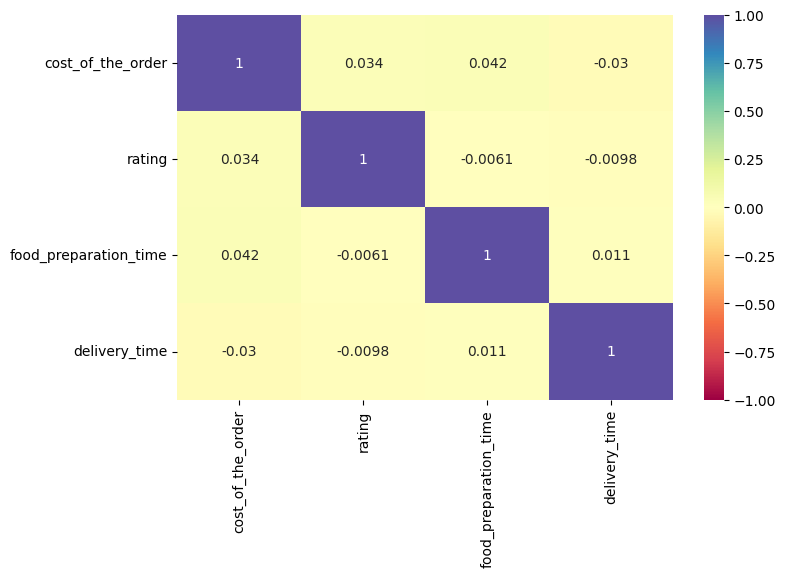

In [ ]:
# Checking the correlation of numerical variables using a heatmap
num_var = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

corr = df[num_var].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='Spectral', vmin=-1, vmax=1);

In [ ]:
# Checking the correlation of numerical variables without the heatmap
df[['cost_of_the_order','food_preparation_time', 'delivery_time','rating']].corr()

,cost_of_the_order,food_preparation_time,delivery_time,rating
cost_of_the_order,1.000000,0.041527,-0.029949,0.033983
food_preparation_time,0.041527,1.000000,0.011094,-0.006083
delivery_time,-0.029949,0.011094,1.000000,-0.009804
rating,0.033983,-0.006083,-0.009804,1.000000


*   There is only very weak correlation between any of the numerical data.
*   The highest correlation is between food preparation time and cost of the order, but this is such a weak correlation of only 4.2%.


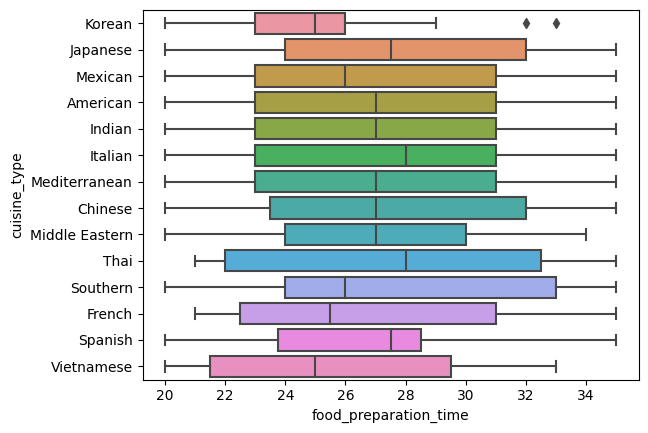

In [ ]:
# Checking relationship between type of cuisine and food prep time
sns.boxplot(data=df, y='cuisine_type', x = 'food_preparation_time');



*   Korean has the smallest IQR in food preparation time, but is the only one with outliers for food prepeation time.
*  Vietnamese has the lowest median time for food preparation time.  



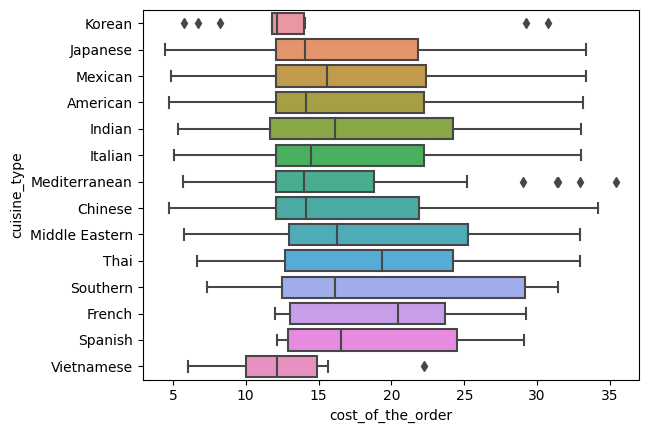

In [ ]:
# Checking relationship between type of cuisine and cost
sns.boxplot(data=df, y='cuisine_type', x = 'cost_of_the_order');



*   Vietnamese and Korean cuisine had cheaper costs of orders
* French cuisine had the highest median cost of orders



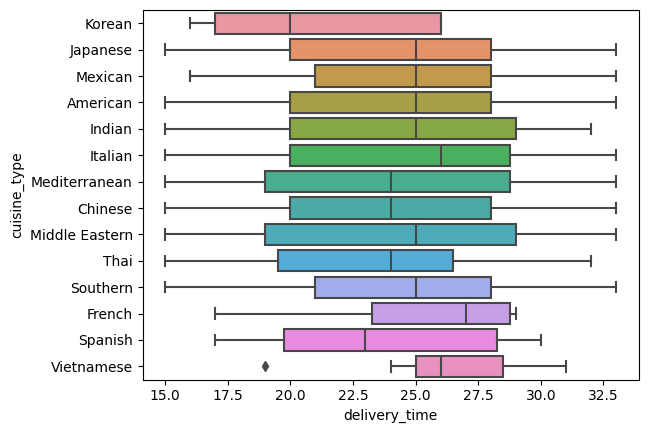

In [ ]:
# Checking relationship between type of cuisine and delivery time
sns.boxplot(data=df, y='cuisine_type', x = 'delivery_time');



*   Korean has the shortest delivery time, with a median time almost less than all others lowest 25%
*   Vietnamese has the smallest IQR



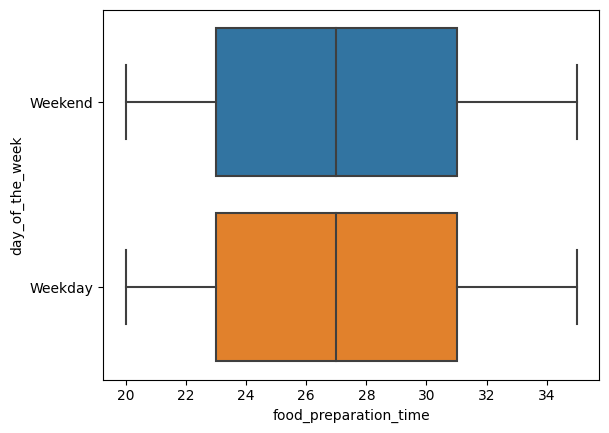

In [ ]:
# Checking day of the week of the order compared to food prep time
sns.boxplot(data=df, x='food_preparation_time', y='day_of_the_week');



*   Food preparation time distribution is the same ordering during the weekday or weekend.

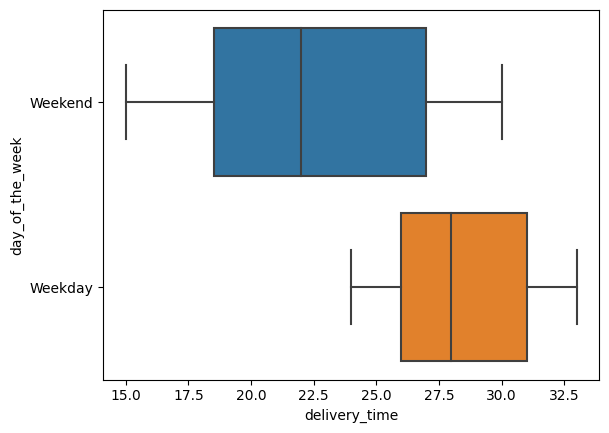

In [ ]:
# Checking day of the week of the order compared to food delivery time
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week');



*   Delivery time for the weekday has less variability (smaller range) and takes longer to have the order delivered once picked up.
*   The median delivery time for the weekend(22min) is less than the weekday(28min) by about 6 minutes.
* 75% of devliveries during the weekend take less time than the median delivery time for the weekday.



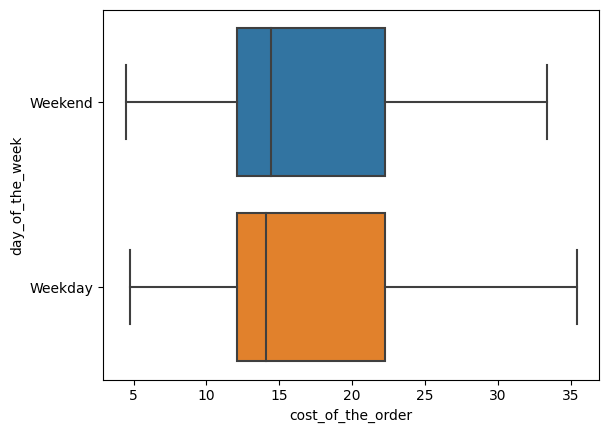

In [ ]:
# Checking day of the week of the order compared to food cost
sns.boxplot(data=df, x='cost_of_the_order', y='day_of_the_week');

*  The distribution of cost of orders is almost the same for the weekend and weekday

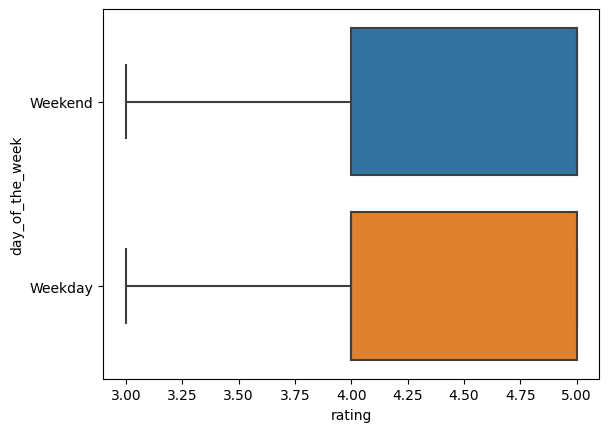

In [ ]:
# Checking day of the week of the order and rating
sns.boxplot(data=df, x='rating', y='day_of_the_week');

* The rating distribution is the same for when ordering on the weekend or weekday

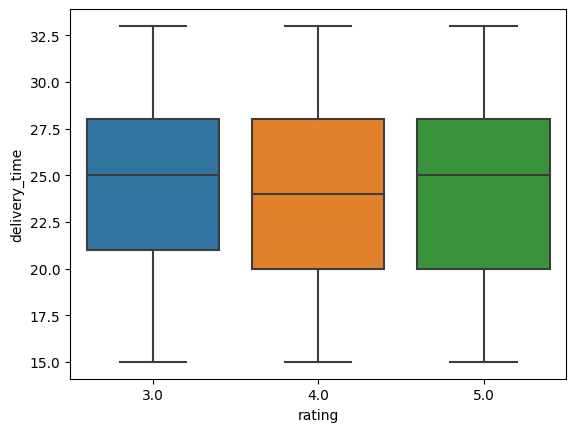

In [ ]:
# comparing rating vs time of delivery
sns.boxplot(data=df, x = 'rating', y = 'delivery_time');



*   Rating doesn't seem to be affected greatly by delivery time, since the distributions are similar



In [ ]:
# Finding Revenue Generated by top 10 restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Create a new column to say if there is a rating or not, has rating = 1, no rating = 0

def num_rat(df):
  if (df['rating']== 5) | (df['rating']==4) | (df['rating']==3):
    return 1

  else:
    return 0

df['has_a_rating'] = df.apply(num_rat, axis=1)

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,has_a_rating
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1


In [ ]:
# finding the number of ratings per restaurant
number_of_ratings = df.groupby('restaurant_name')[['has_a_rating']].sum()
number_of_ratings

,has_a_rating
restaurant_name,
'wichcraft,1
12 Chairs,2
5 Napkin Burger,2
67 Burger,1
Alidoro,0
...,...
Zero Otto Nove,1
brgr,1
da Umberto,1


In [ ]:
# finding the mean of ratings per restaurant
mean_of_ratings = df.groupby('restaurant_name')[['rating']].mean()
mean_of_ratings

,rating
restaurant_name,
'wichcraft,5.000000
12 Chairs,4.500000
5 Napkin Burger,4.000000
67 Burger,5.000000
Alidoro,NaN
...,...
Zero Otto Nove,4.000000
brgr,3.000000
da Umberto,5.000000


In [ ]:
# creating a dataframe with results of number of ratings and mean rating
df1 = pd.merge(number_of_ratings,mean_of_ratings, how='inner', on='restaurant_name')
df1

,has_a_rating,rating
restaurant_name,,
'wichcraft,1,5.000000
12 Chairs,2,4.500000
5 Napkin Burger,2,4.000000
67 Burger,1,5.000000
Alidoro,0,NaN
...,...,...
Zero Otto Nove,1,4.000000
brgr,1,3.000000
da Umberto,1,5.000000


In [ ]:
# Labeling columns appropriately
df1.rename(columns={'has_a_rating':'Number of Ratings', 'rating':'Mean Rating'}, inplace=True)
df1

,Number of Ratings,Mean Rating
restaurant_name,,
'wichcraft,1,5.000000
12 Chairs,2,4.500000
5 Napkin Burger,2,4.000000
67 Burger,1,5.000000
Alidoro,0,NaN
...,...,...
Zero Otto Nove,1,4.000000
brgr,1,3.000000
da Umberto,1,5.000000


In [ ]:
# Showing top 10 by number of ratings
df1.sort_values(by='Number of Ratings', ascending=False).head(10)

,Number of Ratings,Mean Rating
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125
RedFarm Broadway,41,4.243902
Parm,39,4.128205
RedFarm Hudson,34,4.176471
TAO,28,4.357143
Rubirosa,24,4.125000


In [ ]:
#Finding restaurants that have over 50 ratings and have a mean rating of greater than 4

df1[(df1['Number of Ratings']>50)&(df1['Mean Rating']>4)]

,Number of Ratings,Mean Rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
* There are 4 restaurants who meet the critereia(number of ratings >50 & mean rating > 4) to get the promotional offer. They are: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Finding orders of more than $20, greater than 5 and less than or equal to $20, or less than or equal to $5,
# and then applying the charge for associated orders

def revenue(df):
  if (df['cost_of_the_order'] > 20):
    return df['cost_of_the_order']*.25

  elif (df['cost_of_the_order'] > 5):
    return df['cost_of_the_order']*.15

  else:
    return df['cost_of_the_order']*0

df['revenue_generated'] = df.apply(revenue, axis=1)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,has_a_rating,revenue_generated
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,0,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,0,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1,1.7385


In [ ]:
# Finding the total gross revenue generated from deliveries
df['revenue_generated'].sum()

6166.303

In [ ]:
# Shorter syntax way to do it:
def compute_rev(x):
  if x>20:
    return x*.25
  elif x>5:
    return x*.15
  else:
    return x*0

df['revenue'] = df['cost_of_the_order'].apply(compute_rev)

df['revenue'].sum()

6166.303

#### Observations:
* The gross revenue generated by the company across all orders during this time period was $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Finding total time required to deliver the food, and creating a new column with it

df["total_time"] = (df['food_preparation_time'] + df ['delivery_time'])

# Checking data set
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,has_a_rating,revenue_generated,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,0,7.6875,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,0,1.8120,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1,1.8345,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1,7.3000,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1,1.7385,1.7385,49


In [ ]:
# Find Percentage of orders that took more than 60 minutes
print('The percentage of orders that took more than 60 minutes total is', df[df['total_time']>60].shape[0]/df.shape[0]*100, '%')

The percentage of orders that took more than 60 minutes total is 10.537407797681771 %


#### Observations:
*  There were 200 orders that took over 60 minutes to get to their customer.  This is approximately 10.54% of orders during this time period.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

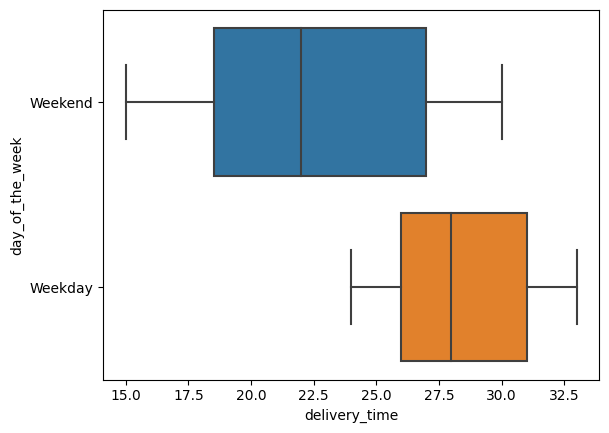

In [ ]:
# Checking day of the week of the order compared to food delivery time
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week');

In [ ]:
# Finding mean delivery times for weekend and weekday
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [ ]:
# Checking to see if rating was affected by when the order was made during the week
df.groupby(['day_of_the_week'])['rating'].mean()

day_of_the_week
Weekday    4.308824
Weekend    4.358881
Name: rating, dtype: float64

#### Observations:
*  Mean delivery time for weekday is 28.34 minutes
*  Mean delivery time for weekend is 22.47 minutes
*  Delivery time for the weekend is less than the weekday by about 6 minutes.

*  Delivery time for the weekday has less variability (smaller range) but generally takes longer to have the order delivered once picked up.
*  75% of deliveries during the weekend take less time than the median delivery time for the weekday.
* Rating of delivery based on when it was delivered is very similar, but the weekend did get slightly higher rating by .05

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   **Cost of the order:** On average the cost of the order is $16.50. The minimum cost was 4.47, while the maximum cost was 35.41. It has a right skewed distribution for cost, meaning majority of orders were on the lower end.

*   **Food Preperation Time:** On average it takes 27.37 minutes for the food to be prepared once it has been ordered. The minimum time for preperation was 20 minutes, while the maximum time was 35 minutes. Distribution of food preparation time is almost uniform, except with four peaks in the data around: 21, 26, 31, and 35 minutes.

* **Delivery Time:** On average the time from pick up of the order to delivery to the customer is 24.16 minutes. The minimum time taken was 15 minutes, and the maximum time was 33 minutes. The distribution of delivery time is slightly left skewed.

*  **Ratings:** There were 736 orders that did not give a rating, and this is about 38.77% of the orders. When rated, about half of the ratings were a 5 out of 5, and no ratings of a 1 or 2 were given.

*  **Cuisine Ordered:** American is the most ordered cuisine. 82% of the orders are from American, Japanese, Italian, and Chinese cuisines.

* **Day of Delivery:** Orders made during the weekend are more than double the orders made during the weekdays. Delivery time for the weekend is less than the weekday by about 6 minutes, and has less variability. Ratings, cost of the order, and food preparation time were very similar for weekday and weekend.

*  Total time for the order to be delivered to the customer is less than an hour for about 89.46% of the orders.

*  More than a third of the customers made more than one order.

*  The top five restaurants ordered from were: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm




### Recommendations:

*  Highlight the option of the top five restaurants ordered from at the top of the online portal.
*  Put the top four cuisine choices at the top of the online portal, since they make up 82% of the orders.
* Using time stamps of when the order was made would be beneficial.  This would allow for more in depth investigation of delivery and preparation times based on the time of day and day itself.  For example if ordering at peak times when people eat compared to off-peak.  Then could also compare the times of the day, breakfast, lunch, and dinner.  
* Change the percentage of revenue per order. Larger costof an order should be less percentage, and smaller cost of order should be greater.  This would incentivize larger orders.  Also, it is not good for the company to make nothing when the charge was less than $5.  Service was still provided, so there should be something made from this services.
* Have a message sent out after the order was delivered to have the customer rate the service.  This should cut down on the percentage of users who do not give a rating.


---